<a href="https://colab.research.google.com/github/tlaet/DataViz/blob/main/DataViz_supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

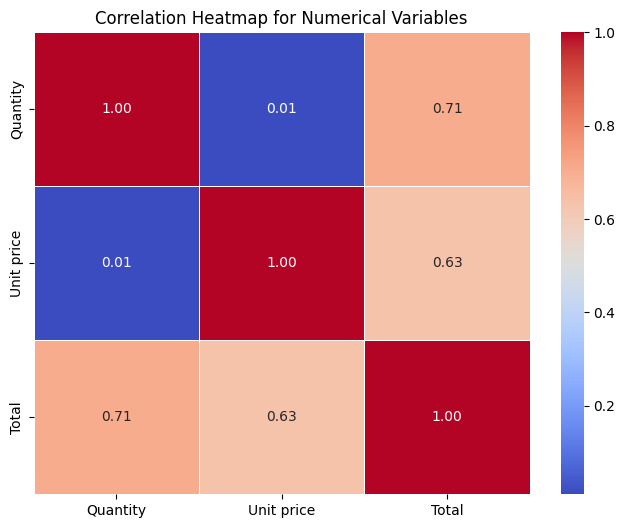

In [15]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('supermarket_sales.csv')

# Convert Date and Time columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Exploratory Data Analysis (EDA) Visualizations
# Pair plot for numerical variables
eda_numeric = df[['Quantity', 'Unit price', 'Total']]
fig = px.scatter_matrix(eda_numeric, title='Pair Plot for Numerical Variables')
fig.show()

# Correlation heatmap
corr_matrix = eda_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

# Distribution of Quantity
fig = px.histogram(df, x="Quantity", title='Distribution of Quantity', labels={'Quantity': 'Quantity'})
fig.show()

# Distribution of Unit Price
fig = px.histogram(df, x="Unit price", title='Distribution of Unit Price', labels={'Unit price': 'Unit Price'})
fig.show()

# Quantity vs Unit Price
fig = px.scatter(df, x="Quantity", y="Unit price", title='Quantity vs Unit Price', labels={'Quantity': 'Quantity', 'Unit price': 'Unit Price'})
fig.show()

# Unit Price by Customer Type
fig = px.box(df, x="Customer type", y="Unit price", title='Unit Price by Customer Type', labels={'Unit price': 'Unit Price'})
fig.show()

# Total Sales by Payment Type
payment_sales = df.groupby('Payment')['Total'].sum()
fig = px.bar(payment_sales, x=payment_sales.index, y="Total", title='Total Sales by Payment Type', labels={'Total': 'Total Sales'})
fig.show()

# % Sales by Product Line
product_sales = df.groupby('Product line')['Total'].sum()
product_sales = (product_sales / product_sales.sum()) * 100
fig = px.pie(product_sales, values=product_sales.values, names=product_sales.index,
             title='% Sales by Product Line',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

# Quantity vs Total Sales
fig = px.scatter(df, x="Quantity", y="Total", trendline="ols", title='Quantity vs Total Sales',
                 labels={'Quantity': 'Quantity', 'Total': 'Total Sales'})
fig.show()

# Sales by City
city_sales = df.groupby('City')['Total'].sum()
fig = px.bar(city_sales, x=city_sales.index, y='Total', title='Sales by City', labels={'Total': 'Total Sales'})
fig.show()

# Sales by Gender
gender_sales = df.groupby('Gender')['Total'].sum()
fig = px.pie(gender_sales, values=gender_sales.values, names=gender_sales.index,
             title='Sales by Gender',
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

# Weekly Sales Trend
df['Weekday'] = df['Date'].dt.day_name()
weekly_sales = df.groupby('Weekday')['Total'].sum()
fig = px.bar(weekly_sales, x=weekly_sales.index, y='Total',
             title='Weekly Sales Trend',
             color_discrete_map={'Monday': 'orange', 'Tuesday': 'blue', 'Wednesday': 'green',
                                 'Thursday': 'red', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'pink'})
fig.update_layout(showlegend=False)  # Remove legend for better appearance
fig.show()

# Sales by time of day
df['Hour'] = df['Time'].dt.hour
hourly_sales = df.groupby('Hour')['Total'].sum()
fig = px.bar(hourly_sales, x=hourly_sales.index, y='Total',
             title='Sales by Time of Day',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(xaxis_title='Hour of Day', yaxis_title='Total Sales')
fig.show()
